# TUGAS 2
Buatlah model CNN untuk klasifikasi dataset MNIST.

## **Import Library**

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## **Load Data**

In [4]:
# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalisasi data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Mengonversi label ke bentuk one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **Build CNN**

In [6]:
# Membangun model CNN
model = models.Sequential()

# Lapisan konvolusi pertama
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Lapisan konvolusi kedua
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Lapisan konvolusi ketiga
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Lapisan flatten
model.add(layers.Flatten())

# Lapisan fully connected
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Mengkompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## **Train Model**

In [11]:
# Melatih model dan menyimpan riwayat pelatihan
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.0387 - val_accuracy: 0.9883
Epoch 2/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0336 - val_accuracy: 0.9899
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.0379 - val_accuracy: 0.9904
Epoch 4/5
750/750 [==============================] - 41s 54ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0347 - val_accuracy: 0.9904
Epoch 5/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0467 - val_accuracy: 0.9895


## **Evaluation Model**

In [12]:
# Mengevaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0388 - accuracy: 0.9898
Test accuracy: 0.989799976348877


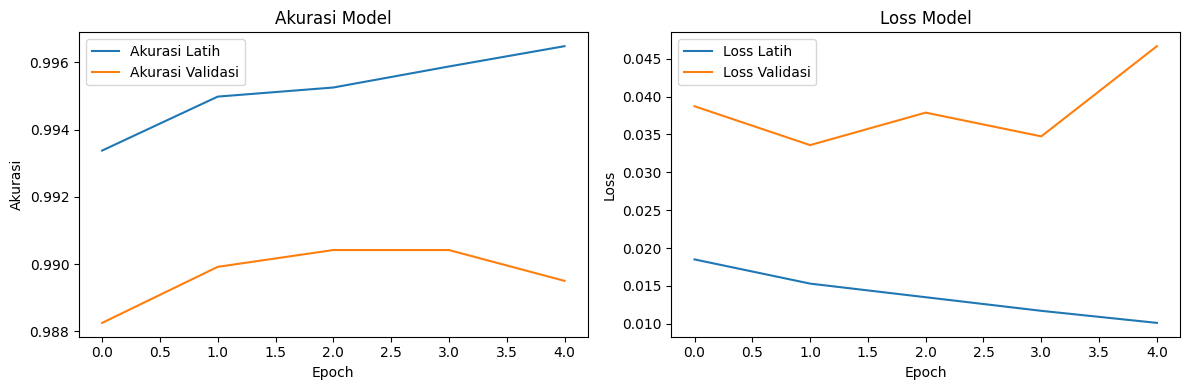

In [13]:
# Visualisasi hasil evaluasi
plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()